In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Call_back(tf.keras.callbacks.Callback):

    def __init__(self, acc_threshold=0.98, print_msg=True):
        super(Call_back, self).__init__()
        self.acc_threshold = acc_threshold
        self.print_msg = print_msg

    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > self.acc_threshold):
            if self.print_msg:
                print("\n-->Reached 96% accuracy so cancelling the training")
            self.model.stop_training = True
        else:
            if self.print_msg:
                print("\nAccuracy not high enough. Starting another epoch...\n")

In [3]:
callbacks = Call_back()

In [4]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [14]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [15]:
def build_model(act_func='relu', output_class=10):
    if act_func=='relu':
        activation=tf.nn.relu
    elif act_func=='sigmoid':
        activation=tf.nn.sigmoid
    elif act_func=='tanh':
        activation=tf.nn.tanh
    elif act_func=='swish':
        activation=tf.nn.swish
        
        
    classifier = Sequential()

    #Step 1- Convolution
    classifier.add(Conv2D(128, (4, 4), input_shape = (28, 28,1), activation = 'relu'))
    classifier.add(Conv2D(64, (4, 4), activation = activation))

    #adding another layer
    classifier.add(Conv2D(32, (4, 4), activation = activation))

    #Pooling it
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    #Adding another layer
    classifier.add(Conv2D(32, (4, 4), activation = activation))
    
    #Pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    #Flatten
    classifier.add(Flatten())
    
    #Step 4- Full connection
    classifier.add(Dense(units = 128, activation = activation))
    classifier.add(Dense(units = 10, activation = 'softmax'))
    classifier.add(Dropout(0.01))

    return classifier

In [16]:
model = build_model(act_func='swish', output_class=10)

In [17]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 25, 25, 128)       2176      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 64)        131136    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 19, 19, 32)        32800     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 32)          16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)              

In [19]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.6348 - accuracy: 0.8029
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 360s 6ms/sample - loss: 0.6351 - accuracy: 0.8029
Epoch 2/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.8702
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 362s 6ms/sample - loss: 0.4290 - accuracy: 0.8702
Epoch 3/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.3853 - accuracy: 0.8852
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 359s 6ms/sample - loss: 0.3852 - accuracy: 0.8852
Epoch 4/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.3527 - accuracy: 0.8956
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 367s 6ms/sample - loss: 0.3

In [20]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 7s 738us/sample - loss: 0.2913 - accuracy: 0.9070


[0.29129293778687715, 0.907]

In [21]:
model.save('Fashion_mnist_9070.h5')

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              rotation_range=20)

datagen.fit(x_train)

In [36]:
model = Sequential()
# Add convolution 2D
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same',input_shape=(28,28,1)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer="Adam",
              metrics=['accuracy'])

In [37]:
from sklearn.model_selection import train_test_split
x_tr,x_vl, y_tr,y_vl = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
earlystop=EarlyStopping(monitor='val_loss', patience=3)

train_model = model.fit(x_tr, y_tr, batch_size=32, epochs=50, verbose=1, validation_data=(x_vl, y_vl),callbacks=[reduce_lr])


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 342s 7ms/sample - loss: 0.5399 - accuracy: 0.8037 - val_loss: 0.7887 - val_accuracy: 0.7121
Epoch 2/50
48000/48000 [==============================] - 346s 7ms/sample - loss: 0.3537 - accuracy: 0.8696 - val_loss: 0.2904 - val_accuracy: 0.8888
Epoch 3/50
48000/48000 [==============================] - 366s 8ms/sample - loss: 0.3024 - accuracy: 0.8896 - val_loss: 0.2784 - val_accuracy: 0.8959
Epoch 4/50
48000/48000 [==============================] - 352s 7ms/sample - loss: 0.2739 - accuracy: 0.9021 - val_loss: 0.2723 - val_accuracy: 0.9022
Epoch 5/50
48000/48000 [==============================] - 348s 7ms/sample - loss: 0.2522 - accuracy: 0.9096 - val_loss: 0.2605 - val_accuracy: 0.9054
Epoch 6/50
48000/48000 [==============================] - 355s 7ms/sample - loss: 0.2404 - accuracy: 0.9136 - val_loss: 0.2367 - val_accuracy: 0.9112
Epoch 7/50
48000/48000 [==========================

In [39]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 12s 1ms/sample - loss: 0.3999 - accuracy: 0.9410


[0.3998530549506275, 0.941]

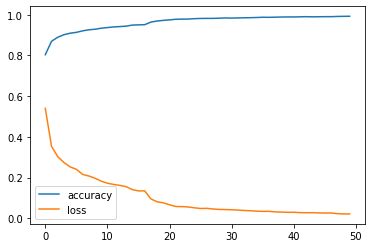

In [46]:
plt.plot(train_model.history['accuracy'], label='accuracy')
plt.plot(train_model.history['loss'], label='loss')
plt.legend()

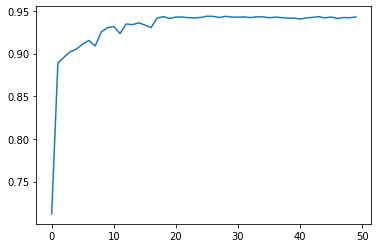

In [43]:
plt.plot(train_model.history['val_accuracy'])

In [48]:
predictions=model.predict_classes(x_test)
print(predictions.shape)

(10000,)


In [53]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [52]:
y_actual=np.argmax(y_test)
print(y_actual.shape)

()


In [54]:
s=0
for i in range(10000):
    if(predictions[i]==y_test[i]):
        s+=1

print(s)
print("Test Accuracy:",float(s/10000))

9410
Test Accuracy: 0.941


In [56]:
model.save('Fashion_mnist_941.h5')